In [1]:
## IMPORTS

from system import System
from estimator import *
from dataprocessing import DataCollector

from tqdm import tqdm


100%|██████████| 1000/1000 [00:40<00:00, 24.66it/s]


MSE(BayesianEstimator): 1.131MHz
MSE(BayesianSmoothEstimator): 0.801MHz
MSE(MeanFilter): 0.711MHz


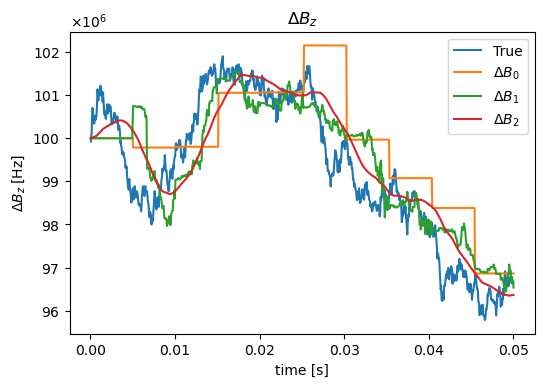

In [2]:

## MAIN

if __name__ == "__main__":

    # Simulation parameters
    D = 11.5e3 ** 2 / 1e-6
    #D = 0
    T = 50e-6 # Timestep of each experiment
    alpha = 0.25
    #alpha = 0
    beta = 0.67
    #beta = 1
    B0 = 100e6

    # System definition
    sys = System(D, T, alpha, beta, B0)

    # Estimator parameters
    tau = 1e-9
    M = 100
    SD_B = 100e6
    sig = 1.00693166885

    # Estimator definition
    estimators = [BayesianEstimator(sys, M, tau, SD_B, B0),
                BayesianSmoothEstimator(sys, M, tau, SD_B, B0),
                #BayesianExpSamplingEstimator(sys, M, tau, SD_B, B0, sig),
                MeanFilter(sys, M, B0)
                ]

    # Data collector definition
    dc = DataCollector()

    for _ in tqdm(range(1000)):
        # Update the system and estimator
        sys.update()

        for estimator in estimators:
            estimator.update()
        
        dc.append(0, sys.time, sys.B,
                *[estimator.estimate() for estimator in estimators])

    # Print the results out
    for i, estimator in zip(range(len(estimators)), estimators):
        print("MSE({}): {:.03f}MHz".format(type(estimator).__name__, dc.mse(i) / 1e6))

    dc.visualize_exp(0, 'ref', *range(len(estimators)))

/home/ghkim/anaconda3/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/parallel.py:51: UserWarning: Could not import IPython parallel. Parallelization support will be disabled.
  warnings.warn(
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 2 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 3 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid mode

/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 38 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 37 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 29 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 34 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 41 particles within 1000 iterations.
  warnings.wa

/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 88 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 72 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 94 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 86 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 65 particles within 1000 iterations.
  warnings.wa

/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 71 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 74 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 93 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 97 particles within 1000 iterations.
  warnings.warn((
/home/ghkim/anaconda3/lib/python3.8/site-packages/qinfer/resamplers.py:346: ResamplerWarning: Liu-West resampling failed to find valid models for 77 particles within 1000 iterations.
  warnings.wa

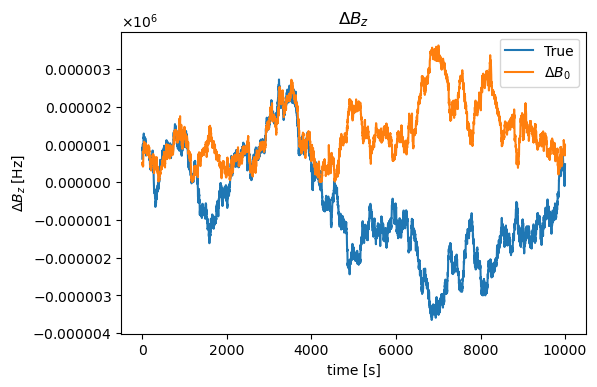

[2.73293232]


In [3]:
from qinfer import (
SimplePrecessionModel, 
RandomWalkModel, 
NormalDistribution, 
UniformDistribution, 
SMCUpdater
)

import matplotlib.pyplot as plt

model = RandomWalkModel(underlying_model=SimplePrecessionModel(), step_distribution=NormalDistribution(0, 0.05**2))

prior = UniformDistribution([0, 1])
updater = SMCUpdater(model, 1000, prior)

expparams = np.empty((1, ), dtype=model.expparams_dtype)

true_trajectory = []
est_trajectory = []

true_params = prior.sample()

# Data collector definition
dc = DataCollector()

for idx_exp in range(10000):
    # We don't want to grow the evolution time to be arbitrarily
    # large, so we'll instead choose a random time up to some
    # maximum.
    expparams[0] = np.random.random() * 10 * np.pi
    datum = model.simulate_experiment(true_params, expparams)
    updater.update(datum, expparams)

    # We index by [:, :, 0] to pull off the index corresponding
    # to experiment parameters.
    true_params = model.update_timestep(true_params, expparams)[:, :, 0]

    dc.append(0, idx_exp, true_params[0], updater.est_mean())

dc.visualize_exp(0, 'ref', 0)
print(dc.mse(0))